In [9]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
X=[]
Y=[]
RAW_X=[]
resize_dim = (64, 64)
# Paths to dataset folders
input_folder = r"C:\Users\princ\Downloads\Vision datasets\archive (1) - Copy\casia dataset\50Classes"  
# Iterate over class folders in the dataset
for class_idx, class_folder in enumerate(os.listdir(input_folder)):
    class_path = os.path.join(input_folder, class_folder)
    if os.path.isdir(class_path):
        # Process each image in the class folder
        for filename in os.listdir(class_path):
            # Load the image in RGB
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
            resized_image = cv2.resize(image, resize_dim)
            
            #normalized_image = normalize_image(resized_image)
            RAW_X.append(resized_image)
            #X.append(normalized_image)
            Y.append(class_idx)                        
                

In [11]:
# Convert X to a numpy array for easier computation
RAW_X = np.array(RAW_X)
Y= np.array(Y)

mean = np.mean(RAW_X, axis=(0, 1, 2)) 
std  = np.std(RAW_X, axis=(0, 1, 2)) 

X = (RAW_X-mean)/std
#Compute channel-wise global minimum and maximum
global_min = np.min(X, axis=(0, 1, 2))  # Shape: (3,) -> Min for R, G, B
global_max = np.max(X, axis=(0, 1, 2))  # Shape: (3,) -> Max for R, G, B

# Normalize each channel independently
X_scaled = np.zeros_like(X, dtype=np.float32)
for channel in range(3):
    X_scaled[..., channel] = (X[..., channel] - global_min[channel]) / (global_max[channel] - global_min[channel])

print(f"Global Min (per channel): {global_min}")
print(f"Global Max (per channel): {global_max}")
print("All images are now scaled to the range [0, 1] per channel.")

Global Min (per channel): [-1.91448809 -1.72439988 -1.53392181]
Global Max (per channel): [1.70697092 2.45827791 2.7574302 ]
All images are now scaled to the range [0, 1] per channel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


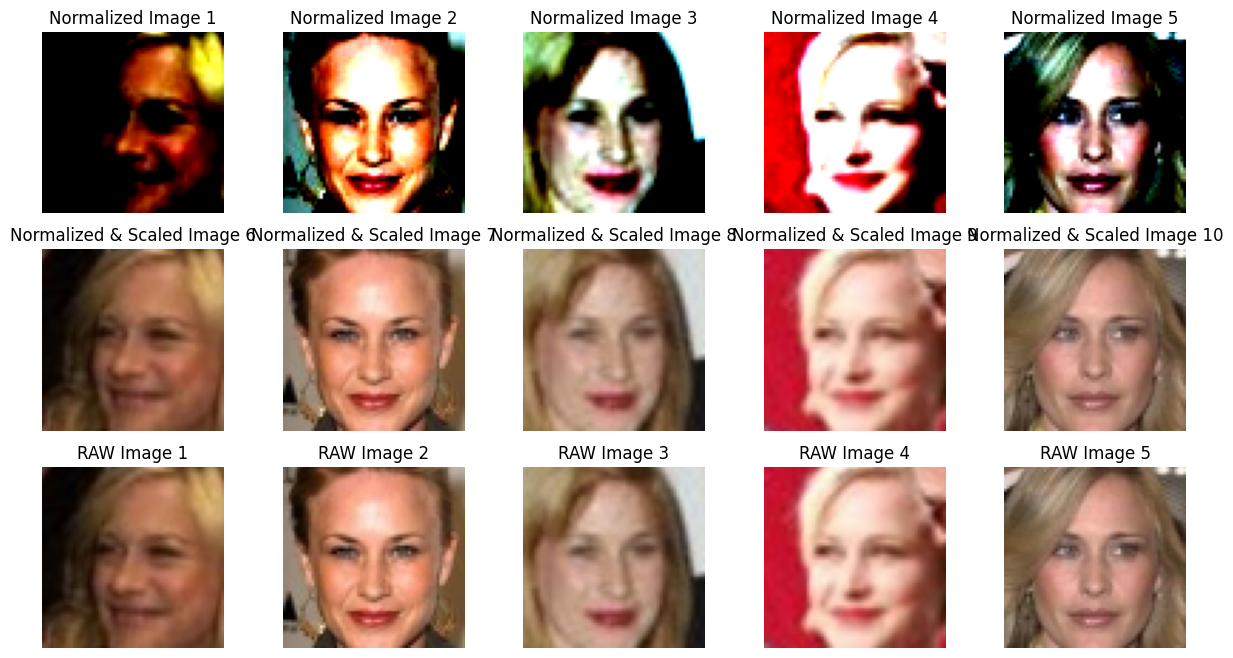

In [12]:
# Plot 5 random images from the X array
plt.figure(figsize=(15, 8))  
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(X[i]) 
    plt.axis('off')  
    plt.title(f"Normalized Image {i+1}")
    
    plt.subplot(3, 5, i+6)  
    plt.imshow(X_scaled[i]) 
    plt.axis('off')  
    plt.title(f"Normalized & Scaled Image {i+6}")
    
    plt.subplot(3, 5, i+11)  
    plt.imshow(RAW_X[i]) 
    plt.axis('off')  
    plt.title(f"RAW Image {i+1}")
plt.show()

In [13]:
X_scaled[0]

array([[[0.33333334, 0.23137255, 0.22745098],
        [0.24313726, 0.15686275, 0.14509805],
        [0.16470589, 0.10588235, 0.09411765],
        ...,
        [0.5411765 , 0.41568628, 0.23137255],
        [0.43529412, 0.30588236, 0.13725491],
        [0.49803922, 0.3647059 , 0.20784314]],

       [[0.32156864, 0.22745098, 0.21960784],
        [0.2       , 0.12156863, 0.10980392],
        [0.11764706, 0.05490196, 0.04313726],
        ...,
        [0.6392157 , 0.5019608 , 0.32156864],
        [0.49019608, 0.3529412 , 0.18431373],
        [0.44705883, 0.30980393, 0.14901961]],

       [[0.27450982, 0.19215687, 0.18039216],
        [0.14509805, 0.07450981, 0.05882353],
        [0.07843138, 0.02352941, 0.01176471],
        ...,
        [0.7137255 , 0.5647059 , 0.38039216],
        [0.5882353 , 0.4392157 , 0.26666668],
        [0.48235294, 0.33333334, 0.16470589]],

       ...,

       [[0.2901961 , 0.16078432, 0.09019608],
        [0.3764706 , 0.24705882, 0.17254902],
        [0.44705883, 0

In [14]:
X= np.array(X)
Y= np.array(Y)
# Split the data into 70% training, 15% validation, and 15% testing
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.15, random_state=42)



In [15]:
X_train[0]

array([[[-0.84935309, -0.52700585,  0.09847484],
        [-0.77834409, -0.44499256,  0.1321325 ],
        [ 0.35779992,  0.9000254 ,  1.46161018],
        ...,
        [-1.01977469, -0.6254218 ,  0.18261899],
        [-1.00557289, -0.54340851,  0.23310549],
        [-1.00557289, -0.51060319,  0.26676315]],

       [[-0.84935309, -0.49420053,  0.14896133],
        [-0.67893149, -0.28096598,  0.30042081],
        [ 0.47141432,  1.04764932,  1.61306966],
        ...,
        [-1.03397649, -0.64182445,  0.16579016],
        [-1.03397649, -0.57621382,  0.19944782],
        [-1.03397649, -0.54340851,  0.23310549]],

       [[-0.87775669, -0.52700585,  0.1321325 ],
        [-0.46590449, -0.05132877,  0.58651095],
        [ 0.64183592,  1.24448121,  1.8486733 ],
        ...,
        [-1.07658189, -0.69103243,  0.11530367],
        [-1.07658189, -0.60901914,  0.16579016],
        [-1.07658189, -0.59261648,  0.16579016]],

       ...,

       [[-1.36061789, -1.01908559, -0.40639011],
        [-1

In [16]:
#saving the train ,test and validation normalized dataset to be used later 

np.savez_compressed('X_train_4.npz', X=X_train)
np.savez_compressed('Y_train_4.npz', X=Y_train)

np.savez_compressed('X_test_4.npz', X=X_test)
np.savez_compressed('Y_test_4.npz', X=Y_test)

np.savez_compressed('X_val_4.npz', X=X_val)
np.savez_compressed('Y_val_4.npz', X=Y_val)

np.savez_compressed('X_train_5.npz', X=X_train_1)
np.savez_compressed('Y_train_5.npz', X=Y_train_1)

np.savez_compressed('X_test_5.npz', X=X_test_1)
np.savez_compressed('Y_test_5.npz', X=Y_test_1)
